In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.models.resnet as resnet
import common_utils
import os

In [2]:
%matplotlib inline

In [3]:
model = resnet.resnet18()
model.load_state_dict(torch.load('pytorch_resnet_model_80e'))
model = model.cuda().eval()

In [20]:
train, _, _ = common_utils.get_dataloaders()

Francisco Goya: 34115.jpg
Zinaida Serebriakova: 63573.jpg
Pablo Picasso: 93482.jpg
Boris Kustodiev: 74118.jpg
Camille Corot: 41389.jpg
Eugene Boudin: 52903.jpg
Claude Monet: 57525.jpg
Erte: 52394.jpg
Albrecht Durer: 40029.jpg
Ivan Shishkin: 79426.jpg
Zdislav Beksinski: 66847.jpg
Giovanni Battista Piranesi: 102247.jpg
Boris Kustodiev: 93307.jpg
Martiros Saryan: 28465.jpg
Martiros Saryan: 64849.jpg
Odilon Redon: 91.jpg
Fernand Leger: 91017.jpg
Claude Monet: 57661.jpg
Boris Kustodiev: 18845.jpg
Isaac Levitan: 48912.jpg
Zdislav Beksinski: 16108.jpg
Salvador Dali: 102567.jpg
Claude Monet: 3595.jpg
Pierre-Auguste Renoir: 37517.jpg
Ivan Aivazovsky: 84549.jpg
Raphael Kirchner: 32672.jpg
Camille Pissarro: 74618.jpg
Nicholas Roerich: 34317.jpg
Pyotr Konchalovsky: 39892.jpg
James Tissot: 69883.jpg
Camille Pissarro: 86821.jpg
Gustave Dore: 40338.jpg
Odilon Redon: 38244.jpg
Marc Chagall: 84435.jpg
Eugene Boudin: 77390.jpg
Odilon Redon: 85019.jpg
Pierre-Auguste Renoir: 79467.jpg
Zdislav Beksinski: 4

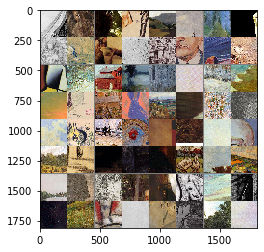

In [9]:
common_utils.show_sample_images(train)

In [4]:
# Grab a Picasso image
img = common_utils.fetch_image('25482.jpg')

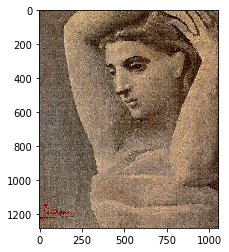

In [5]:
plt.imshow(img)

In [9]:
transformed = common_utils.train_loader_transform(img).cuda()
output = model(transformed.view(1,3, 224,224))

In [10]:
output[0,31]

tensor(5.6768, device='cuda:0', grad_fn=<SelectBackward>)

In [11]:
predicted = torch.max(output,1)
predicted

torch.return_types.max(
values=tensor([5.6768], device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([31], device='cuda:0'))

In [12]:
label_to_artist, artist_to_label = common_utils.init_label_dicts()

In [13]:
label_to_artist

{0: 'Ivan Aivazovsky',
 1: 'Gustave Dore',
 2: 'Odilon Redon',
 3: 'Rembrandt',
 4: 'Edgar Degas',
 5: 'Claude Monet',
 6: 'Albrecht Durer',
 7: 'Francisco Goya',
 8: 'Theophile Steinlen',
 9: 'Ivan Shishkin',
 10: 'Giovanni Battista Piranesi',
 11: 'Camille Corot',
 12: 'Pierre-Auguste Renoir',
 13: 'Childe Hassam',
 14: 'Raphael Kirchner',
 15: 'James Tissot',
 16: 'Alfred Sisley',
 17: 'Paul Cezanne',
 18: 'John Singer Sargent',
 19: 'Vincent van Gogh',
 20: 'Zdislav Beksinski',
 21: 'Camille Pissarro',
 22: 'Eugene Boudin',
 23: 'Fernand Leger',
 24: 'Boris Kustodiev',
 25: 'Nicholas Roerich',
 26: 'Ilya Repin',
 27: 'Martiros Saryan',
 28: 'Isaac Levitan',
 29: 'Pyotr Konchalovsky',
 30: 'Salvador Dali',
 31: 'Pablo Picasso',
 32: 'Henri Matisse',
 33: 'Marc Chagall',
 34: 'Erte',
 35: 'Paul Gauguin',
 36: 'Eyvind Earle',
 37: 'Zinaida Serebriakova'}